비지도 학습; 여기서는 데이터의 비지도 변환과 군집에 대하여 알아보자

(1)비지도 변환(Unsupervised Transformation)

- 데이터를 새롭게 표현하는 하거나 원래 데이터 보다 쉽게 해석 될 수 있도록 만듬
- 대표적인 것은 차원 축소(Demesionality Reduction): 
  특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 테이터로 표현함
  (예) 시각화를 위하여 데이터셋을 2차원으로 변경하는 경우
- 데이터를 구성하는 단위나 성분을 찾기도 함
  (예) 많은 텍스트 문서에서 주제를 추출하는 일 
  (예) 소셜 미디어에서 선거, 총기 규제, 팝스타 같은 주제로 일어나는 토론을 추적할때 등등
  
(2) 군집 알고리즘(Clustering)

- 데이터를 비슷한 것끼리 묶는 것
- (예) 소셜 미디어에서 업로드된 사진을 분류하는 일:
  사진에 나타난 모든 얼굴을 추출하여 비슷한 얼굴로 그룹 짓는일
  만약 얼굴들이 같은 사람이라면 이미지들을 그룹으로 잘 묶은 것임

3.2 비지도 학습의 도전 과제

(1) 가장 어려운 일은 잘되었는지를 평가하는것(레이블이 없이 출발하므로)

- 경우에 따라서는 직접 확인 하는 것이 유일한 방벙일 때도 있다

(2) 따라서 탐섹적 분석 단계에 많이 사용된다.

- 즉, 지도학습의 전처리 단계에 많이 사용됨
- 비지도 학습의 결과로 새롭게 표현된 데이터를 사용하여 학습하면 지도 학습의 정확도가 올라간다


3.3 데이터 전처리와 스케일 조정

- 비지도 방식의 대표적인 예(지도 학습에서 많이 사용되지만)

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

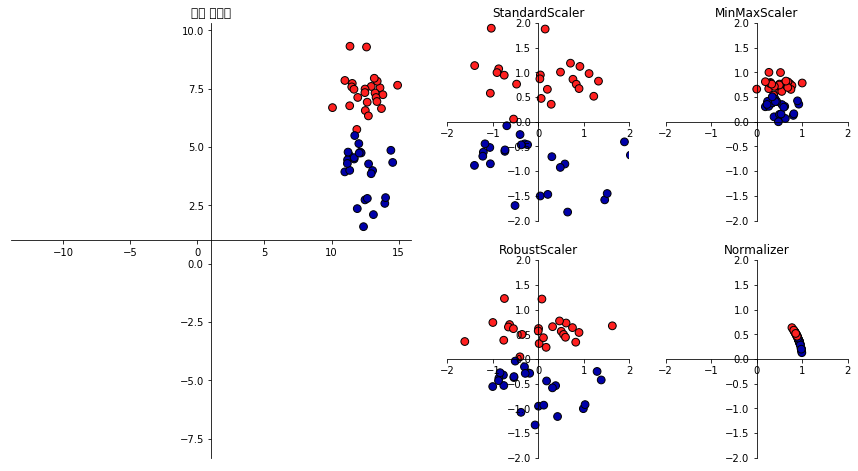

In [2]:
# 특성 별 스케일 조정의 예

mglearn.plots.plot_scaling()

3.3.1 여러가지 전처리 방법

(1) StandardScaler

각 특성의 평균을 0, 분산을 1로 변경하여 모듬 특성이 같은 크기를 가지게 함

그러나 최대값과 최소값을 제한 하지는 않음

(2) RobustScaler

특성들이 같은 스케일을 같는 다는 측면에서는 StandardScaler와 비슷하지만,

평균이나 분산 대신 중간값(median)과 사분위값(qaurtile)을 사용한다

따라서 전체 데이터와 아주 동 떨어진(예를 들면 측정에러)에 영향을 받지 않는다.
이상치에 영향을 받지 않는 방법으로 매우 유용할 수도..(다른 기법은 문제가 될 수 있음)

(3) MinMaxScaler

모든 특성들이 정확하게 0과 1 사이으ㅔ 위치 하도록 데이터를 변경

2차원 데이터의 경우는 x축과 y축의 0과 1 사이의 정사각형 안에 모든 데이터 위치함

(4) Normalizer

매우 다른 스케일 조정법 = 특성 벡터의 유클리디안 거리가 모두 1이 되도록 데이터 포인트를 조정함

지름이 1인 원(3차원의 경우는 지름이 1인 구)에 데이터 포인트를 투영함
즉, 각 데이터 포인트가 다른 비율로(거리에 반비례하여) 스케일이 조정된다

이러한 정규화(normlization)는 특성 벡터의 길이는 상관 없고 데이터의 방향(또는 각도)만이 중요할 때 사용



3.3.2 데이터 변환 적용하기

cancer 데이터를 이용하고 MinMaxScaler를 적용한 예를 살펴보자

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


전처리가 구현된 파이선 클래스를 가져와 객체를 생성하자

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

다음으로 fit()를 사용하여 데이터를 훈련시키자.

여기서 알아야 할 것은 scale 객체는 fit()을 호출할 때 훈련데이터(X_train)에만 사용.(y_train은 사용 안함)

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

데이터 변환의 적용은 transform() 를 사용한다

sci-kit learn 에서 transform()은 새로운데이터 표현을 만들떄 사용하는 메서드

In [6]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
스케일 조정 전 특성별 최대값:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.2260

테스트 세트도 변환하자

In [7]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


여기서 놀라운 점은 값들이 0과 1사이를 벗어난 것도 있다는 점.

따라서 항상 스케일을 적용할 때는 훈련 데이터와 테스트 데이터에 같은 변환을 제공 해야 함

아래의 좋은 예와 나쁜 예를 살펴보자

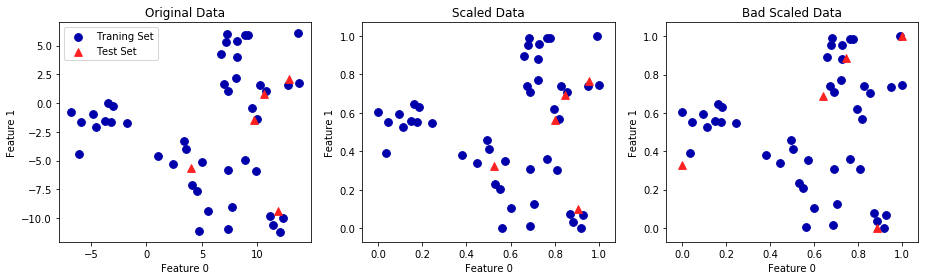

In [8]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Traning Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test Set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Traning Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test Set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Bad Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

(가운데 그래프)
- 훈련세트를 사용해 fit()를 호출하고 훈련세트와 테스트 세트에 transform()를 적용함
- 축의 눈금만 바뀌고 원본 데이터와 동일함
- 모든 특성은 0과 1사이에 존재하지만 테스트 데이터는 최소 최대 값이 0과 1은 아님

(마지막 그래프) == 절대 안되는 방식
- 테스트세트도 fit()을 호출하여 적용한 케이스로 테스트 세트도 최대 최소값이 1과 0이 됨
- 다른 비율로 적용되어 원본 데이터와 모양이 완전히 바뀌게 됨.

조금 더 효율적인 방법 StandardScaler를 적용한 효율적인 작성으 예

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

3.3.4 지도학습에서 데이터 전처리의 효과

cancer 데이터에 MinMaxScaler를 적용한 효과를 SVC를 학습시키는 경우로 알아 보자

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


In [11]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [12]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
